# EDA on Infant Cries Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import pandas as pd

## Loading dataset

In [2]:
!ls

donateacry_corpus_cleaned_and_updated_data.zip	sample_data


In [3]:
!unzip donateacry_corpus_cleaned_and_updated_data.zip

Archive:  donateacry_corpus_cleaned_and_updated_data.zip
   creating: donateacry_corpus_cleaned_and_updated_data/belly_pain/
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138536-1.0-m-72-bp.wav  
  inflating: donateacry_corpus_cleaned_and_updated_data/belly_pain/643D64A

## Preparing dataset for EDA

In [4]:
def list_files(folder_path):
    file_list = []

    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            file_list.append(file_path)

    return file_list

# Provide the path to the folder you want to list files from
folder_path = "/content/donateacry_corpus_cleaned_and_updated_data"

# Call the function to list the files
files = list_files(folder_path)

# Print the file names
#for file in files:
#    print(file)

### Extracting Gender, Age and reason for cry from filename and duration of the file by loading the file to librosa

In [5]:
def get_duration(filename):
    audio_data, sample_rate = librosa.load(filename)
    audio_duration = librosa.get_duration(y=audio_data, sr=sample_rate)
    return audio_duration

df = pd.DataFrame(files, columns=['filename'])

# Splitting the string into separate columns and extracting the last three columns
df[['gender', 'age', 'label']] = df['filename'].str.split('-', expand=True).iloc[:, -3:]

df['duration'] = df['filename'].apply(get_duration)
df['label'] = df['label'].apply(lambda x: x.split('.')[0])

print(df)

                                              filename gender age label  \
0    /content/donateacry_corpus_cleaned_and_updated...      m  26    bp   
1    /content/donateacry_corpus_cleaned_and_updated...      m  72    bp   
2    /content/donateacry_corpus_cleaned_and_updated...      m  26    bp   
3    /content/donateacry_corpus_cleaned_and_updated...      m  72    bp   
4    /content/donateacry_corpus_cleaned_and_updated...      m  26    bp   
..                                                 ...    ...  ..   ...   
452  /content/donateacry_corpus_cleaned_and_updated...      m  04    ch   
453  /content/donateacry_corpus_cleaned_and_updated...      f  26    ch   
454  /content/donateacry_corpus_cleaned_and_updated...      f  48    dc   
455  /content/donateacry_corpus_cleaned_and_updated...      m  04    dc   
456  /content/donateacry_corpus_cleaned_and_updated...      f  26    dc   

     duration  
0        7.00  
1        7.00  
2        6.90  
3        7.00  
4        6.96  
.. 

## Understanding data

### checking null values and shape of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  457 non-null    object 
 1   gender    457 non-null    object 
 2   age       457 non-null    object 
 3   label     457 non-null    object 
 4   duration  457 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.0+ KB


### Verifying extracted age column to contain only below identified values
- 04 - 0 to 4 weeks old
- 48 - 4 to 8 weeks old
- 26 - 2 to 6 months old
- 72 - 7 month to 2 years old
- 22 - more than 2 years old

In [7]:
df.age.unique()

array(['26', '72', '04', '48', '22'], dtype=object)

### Verifying extracted gender column to contain only below identified values
- m - male
- f - female

In [8]:
df.gender.unique()

array(['m', 'f'], dtype=object)

### Verifying extracted label column to contain only below identified values
- hu - hungry
- bu - needs burping
- bp - belly pain
- dc - discomfort
- ti - tired
- lo - lonely
- ch - cold/hot
- sc - scared
- dk - don't know

In [9]:
df.label.unique()

array(['bp', 'ti', 'hu', 'bu', 'dc', 'ch'], dtype=object)

### Verifying duration of all the files is nearly same

In [10]:
df.duration.unique()

array([7.  , 6.9 , 6.96, 6.84, 6.82, 6.86, 6.78, 6.92, 6.88, 6.94, 6.52,
       6.66, 6.68, 7.04, 7.06, 6.72, 6.64, 6.62, 6.74, 7.02, 6.76, 6.54,
       6.98])

### Understanding distribution of genders

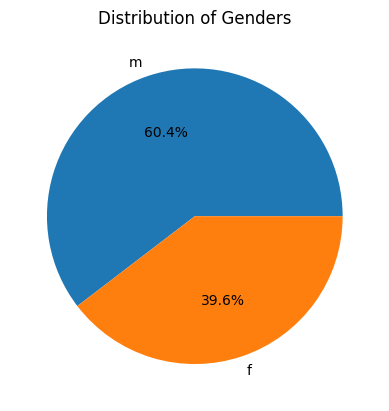

In [11]:
import seaborn as sns

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Genders')
plt.show()

### Understanding distribution of age

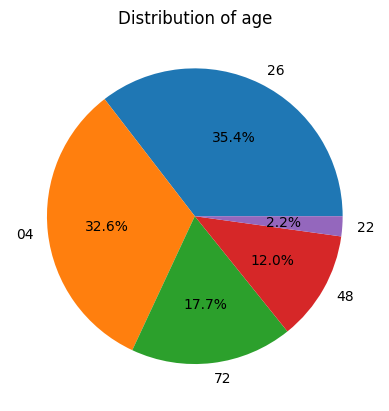

In [12]:
# Count the occurrences of each age
gender_counts = df['age'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of age')
plt.show()

### Understanding distribution of label

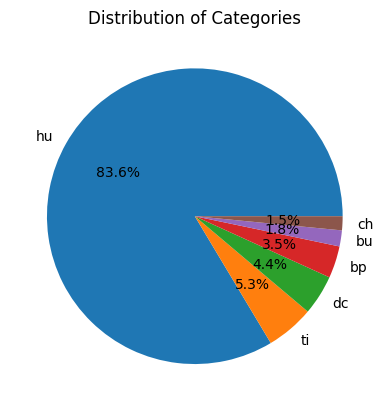

In [13]:
# Count the occurrences of each label
gender_counts = df['label'].value_counts()

# Create a pie chart using Seaborn
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

### Understanding Relationship between Gender and Label

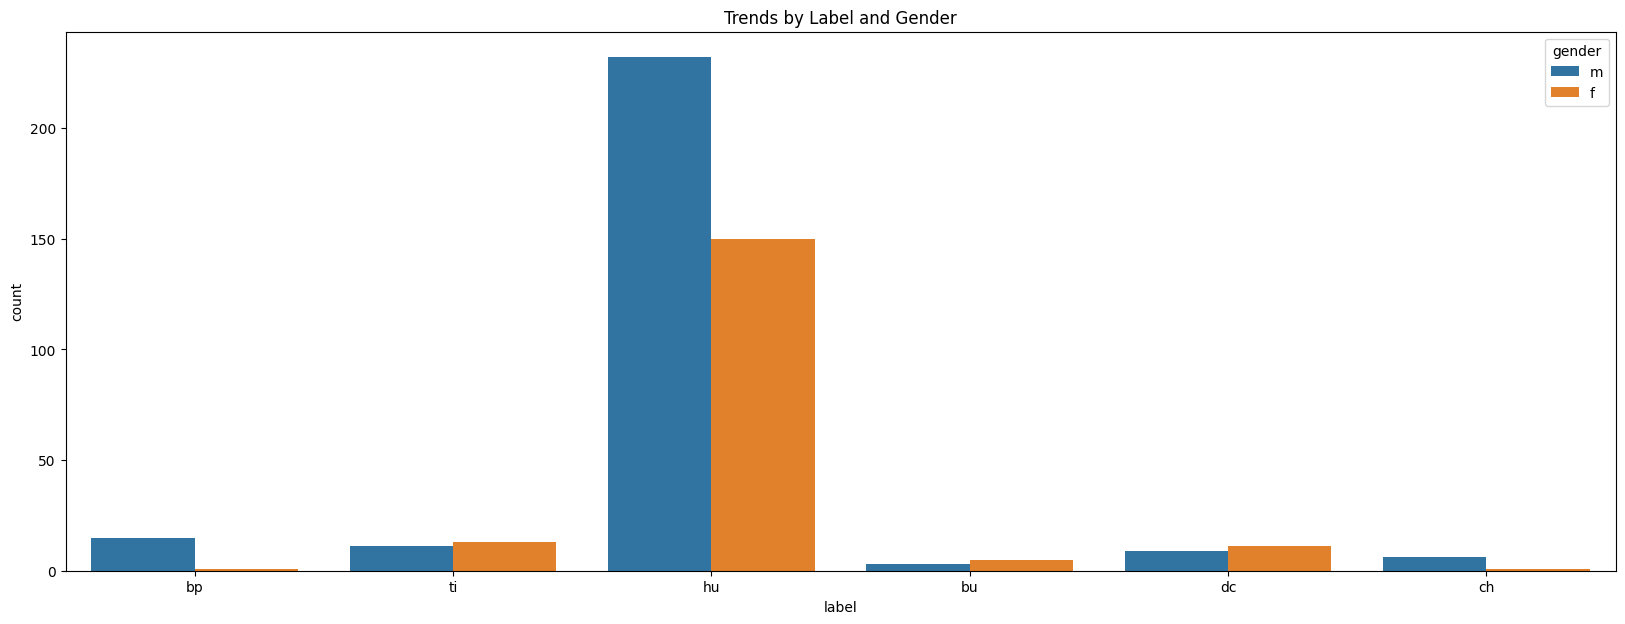

In [14]:
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.countplot(x="label", hue="gender", data=df, ax=ax)
plt.title('Trends by Label and Gender')
plt.show()

### Understanding Relationship between Age and Label

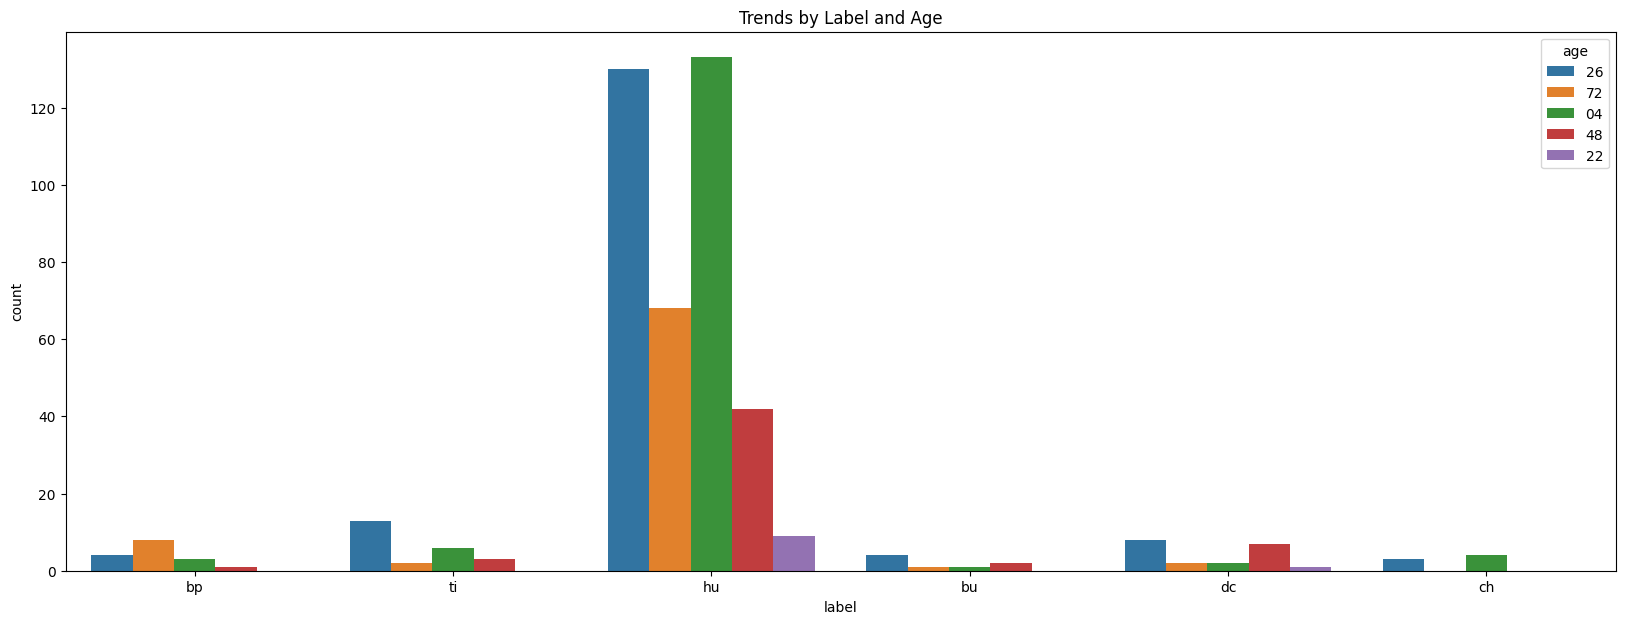

In [15]:
f,ax=plt.subplots(1,1,figsize=(20,7))
sns.countplot(x="label", hue="age", data=df, ax=ax)
plt.title('Trends by Label and Age')
plt.show()

### 2D image representation of a baby cry

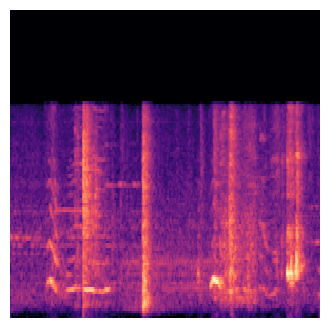

In [16]:
fname = files[1]
samples, sample_rate = librosa.load(fname)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))